In [2]:
import pandas as pd

In [3]:
df_train = pd.read_csv('/Users/tinaschendt/downloads/train.csv')

IOError: File /Users/tinaschendt/downloads/train.csv does not exist

In [ ]:
df_test = pd.read_csv('/Users/tinaschendt/downloads/test.csv')

In [ ]:
df_spray = pd.read_csv('/Users/tinaschendt/downloads/spray.csv')

In [ ]:
df_weather = pd.read_csv('/Users/tinaschendt/downloads/weather.csv')

In [ ]:
#Training data Column Na
# train.csv, test.csv - the training and test set of the main dataset. T
#The training set consists of data from 2007, 2009, 2011, and 2013, 
#while in the test set you are requested to predict the test results for 2008, 2010, 2012, 
#and 2014.
# Id: the id of the record
# Date: date that the WNV test is performed
# Address: approximate address of the location of trap. This is used to send to the GeoCoder. 
# Species: the species of mosquitos
# Block: block number of address
# Street: street name
# Trap: Id of the trap
# AddressNumberAndStreet: approximate address returned from GeoCoder
# Latitude, Longitude: Latitude and Longitude returned from GeoCoder
# AddressAccuracy: accuracy returned from GeoCoder
# NumMosquitos: number of mosquitoes caught in this trap
# WnvPresent: whether West Nile Virus was present in these mosquitos. 
#1 means WNV is present, and 0 means not present. 


In [ ]:
df_train.head()

In [ ]:
df_train.Trap.value_counts()

In [ ]:
y = df_train.WnvPresent

In [ ]:
y.value_counts()

In [ ]:
#baseline accuracy
y.value_counts() / len(y)

In [ ]:
df_train['Date'] = pd.to_datetime(df_train.Date)

In [ ]:
df_train.dtypes

In [ ]:
df_train.WnvPresent.value_counts()

In [ ]:
df_train.groupby(['Species', 'WnvPresent']).count()


In [ ]:
#df_train.groupby(['Trap', 'WnvPresent', 'Block']).count()

df_test.head()

In [ ]:
df_spray.head()

In [ ]:
df_weather.head()

In [ ]:
df_weather.columns

In [ ]:
df_train.describe()

In [ ]:
def eda(dataframe):
    print "missing values \n", dataframe.isnull().sum()
    print "dataframe index \n", dataframe.index
    print "dataframe types \n", dataframe.dtypes
    print "dataframe shape \n", dataframe.shape
    print "dataframe describe \n", dataframe.describe()
    for item in dataframe:
        print item
        print dataframe[item].nunique()

eda(df_train)

def num_missing(x):
  return sum(x.isnull())

#Applying per column:
#print "Missing values per column:"
#print data.apply(num_missing, axis=0) #axis=0 defines that function is to be applied on each column


In [ ]:
df_train['year'] = df_train['Date'].dt.year
df_train['month'] = df_train['Date'].dt.month

In [ ]:
df_train.head()

In [ ]:
df_2007 = df_train[df_train.year == 2007]

In [ ]:
df_2007.year.unique()

In [ ]:
df_2009 = df_train[df_train.year == 2009]

In [ ]:
df_2011 = df_train[df_train.year == 2011]

In [ ]:
df_2013 = df_train[df_train.year == 2013]

In [ ]:
df_2007[df_2007.WnvPresent == 1].count()

In [ ]:
df_2009[df_2009.WnvPresent == 1].count()

In [ ]:
df_2011[df_2011.WnvPresent == 1].count()

In [ ]:
df_2013[df_2013.WnvPresent == 1].count()

In [ ]:
df_2007.groupby('Block')['WnvPresent'].agg([('WnvPresent==1', 'sum')])



In [ ]:
df_2009.groupby('Block')['WnvPresent'].agg([('WnvPresent==1', 'sum')])



In [ ]:
df_2011.groupby('Block')['WnvPresent'].agg([('WnvPresent==1', 'sum')])



In [ ]:
df_2013.groupby('Block')['WnvPresent'].agg([('WnvPresent==1', 'sum')])



In [ ]:
df_train.Block.unique()

In [ ]:
df_train['lat_long'] = list(zip(df_train.Latitude, df_train.Longitude))

In [ ]:
df_location = df_train.loc[:, ['Trap', 'Latitude', 'Longitude']]

In [ ]:
df_location.head()

In [ ]:
df_location['Trap'].unique()

In [ ]:
Trap = df_location.groupby(['Trap'])

In [ ]:
Trap.head()

In [ ]:
# import gmplot

# gmap = gmplot.GoogleMapPlotter(37.428, -122.145, 16)

# gmap.plot(latitudes, longitudes, 'cornflowerblue', edge_width=10)
# gmap.scatter(more_lats, more_lngs, '#3B0B39', size=40, marker=False)
# gmap.scatter(marker_lats, marker_lngs, 'k', marker=True)
# gmap.heatmap(heat_lats, heat_lngs)

# gmap.draw("mymap.html")

In [ ]:
df_spray['Geo'] = df_spray['Latitude'].map(str) + ', ' + df_spray["Longitude"].map(str)

In [ ]:
geolocator = Nominatim()

In [ ]:
results = geolocator.reverse('42.3916233333, -88.0891633333')


In [ ]:
results.address

***MODEL BUILDING***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.grid_search import GridSearchCV

In [5]:
data = pd.read_csv('./Modeldf2.csv')

In [6]:
data.head()

,WnvPresent,NumMosquitos,Last7Average_Windspeed,Last7Average_Temp,Last7Total_Rainfall,month,T002,T003,T004,T005,...,T237,T238,T900,T903,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS
0,0,1,0.76,68.285714,9.821429,5,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0.76,68.285714,9.821429,5,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0.76,68.285714,9.821429,5,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0.76,68.285714,9.821429,5,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,4,0.76,68.285714,9.821429,5,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
X = data.loc[:, 'NumMosquitos':]
y= data['WnvPresent']

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35, stratify=y)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(6785, 146) (6785,)
(2908, 146) (2908,)


In [9]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

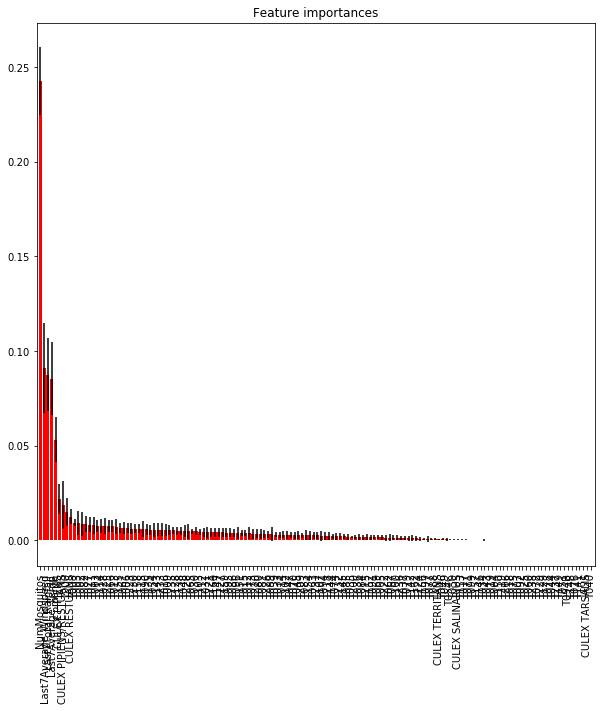

In [10]:
importances = rf.feature_importances_
# calculate the standard deviation of feature importances by looping over the trees in the random forest
# 

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot the feature importances of the forest
plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [11]:
importances = pd.DataFrame(zip(rf.feature_importances_,),
                           index=X.columns, columns=['rf_importance']).sort_values('rf_importance',
                                                                   ascending=False)

                           
importances.plot(kind='bar')
importances.head()

,rf_importance
NumMosquitos,0.242631
Last7Average_Windspeed,0.091066
Last7Total_Rainfall,0.087475
Last7Average_Temp,0.085441
month,0.053200


In [ ]:
# scores = []
# for val in range(0,147):
#     clf = RandomForestClassifier(n_estimators=val)
#     validated =cross_val_score(clf, X, y, cv=10, scoring = 'f1')
#     scored.append(validated)
# scores

In [22]:
cv = StratifiedKFold(y, n_folds=10, shuffle=True, random_state=40)
dt = RandomForestClassifier()
s = cross_val_score(dt, X, y, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Random Forest with unBalanced Classes", s.mean().round(3), s.std().round(3))

Random Forest with unBalanced Classes Score:	0.943 ± 0.003


In [23]:
parameters = {'n_estimators':[100,300,500,700,900,1000], 'criterion': ['gini', 'entropy'],
              'max_depth': [None,2,4,6,8,10], 'min_samples_split': [2,5],
              'class_weight':[None, 'balanced']}
GridRF = GridSearchCV(RandomForestClassifier(n_jobs=-1),parameters, cv=10)

GridRF.fit(X, y)
print "Best Parameters Are " + str(GridRF.best_params_)
print "Best Score is " + str(GridRF.best_score_)

KeyboardInterrupt: 

In [57]:
print 'Model ' + str(GridRF.best_estimator_,)
print 'Evaluation Score'+ str(evaluate_model(GridRF.best_estimator_))

Model RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=3, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
[[2757    0]
 [ 151    0]]
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      2757
          1       0.00      0.00      0.00       151

avg / total       0.90      0.95      0.92      2908

Evaluation Score0.948074277854


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
def evaluate_model(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classrep = classification_report(y_test, y_pred)
    
    print confusion
    print classrep
    return accuracy

In [11]:
from sklearn.metrics import roc_auc_score

In [60]:
y_pred = rf.predict(X_test)
print roc_auc_score(y_test, y_pred)

0.883380534077


In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
evaluate_model(dt)

[[2617  140]
 [ 119   32]]
             precision    recall  f1-score   support

          0       0.96      0.95      0.95      2757
          1       0.19      0.21      0.20       151

avg / total       0.92      0.91      0.91      2908



0.91093535075653365

In [63]:
params = {'criterion': ['gini', 'entropy'],
          'splitter': ['best', 'random'],
          'max_depth': [None, 1,2,3,4,5,6,7,8,9, 10],
          'min_samples_split': [2, 5],
          'min_samples_leaf': [1, 2, 3]}
GridDT = GridSearchCV(dt, params, cv=10)
GridDT.fit(X,y)

print "Best Parameters Are " + str(GridDT.best_params_)
print "Best Score is " + str(GridDT.best_score_)
print 'Model' + str(GridDT.best_estimator_)
print 'Evaluation Score' + str(evaluate_model(GridDT.best_estimator_))

Best Parameters Are {'min_samples_split': 2, 'splitter': 'random', 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1}
Best Score is 0.948210048489
ModelDecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')
[[2757    0]
 [ 151    0]]
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      2757
          1       0.00      0.00      0.00       151

avg / total       0.90      0.95      0.92      2908

Evaluation Score0.948074277854


In [68]:
y_pred2 = GridDT.predict(X_test)
print roc_auc_score(y_test, y_pred2)

0.5


In [65]:
from sklearn.ensemble import BaggingClassifier
bagged_parameters = {'n_estimators': [1, 20],
                  'max_samples': [0.1, 1.0],
                  'max_features': [0.7, 1.0],
                  'bootstrap_features': [True, False]}
BagGridDT = GridSearchCV(BaggingClassifier(GridDT.best_estimator_),bagged_parameters, cv=10)
BagGridDT.fit(X,y)
print "Best Parameters Are " + str(BagGridDT.best_params_)
print "Best Score is " + str(BagGridDT.best_score_)
print 'Model' + str(BagGridDT.best_estimator_)
print 'Evaluation Score' + str(evaluate_model(BagGridDT.best_estimator_))

Best Parameters Are {'max_features': 0.7, 'max_samples': 0.1, 'n_estimators': 20, 'bootstrap_features': True}
Best Score is 0.948106881255
ModelBaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random'),
         bootstrap=True, bootstrap_features=True, max_features=0.7,
         max_samples=0.1, n_estimators=20, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)
[[2757    0]
 [ 151    0]]
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      2757
          1       0.00      0.00      0.00       151

avg / total       0.90      0.95      0.92      2908

Evaluation Score0.948074277854


In [69]:
y_pred3 = BagGridDT.predict(X_test)
print roc_auc_score(y_test, y_pred3)

0.5


***Modeling with 2nd Model Data***

In [4]:
data = pd.read_csv('./train_model_2.0.csv')

In [3]:
data.head()

,WnvPresent,Last7Average_Temp,Species_fac,Last7Average_Windspeed,Last7Total_Rainfall,Last14Average_Temp,Last14Average_Windspeed,Last14Total_Rainfall,Last7Average_Daylight,Last14Average_Daylight,...,Last14Average_Departure,Latitude,Longitude,month,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS
0,0,67.571429,4,10.014286,1.07,63.785714,10.264286,1.66,890.714286,884.357143,...,3.0,41.954690,-87.800991,5,0,1,0,0,0,0
1,0,67.571429,1,10.014286,1.07,63.785714,10.264286,1.66,890.714286,884.357143,...,3.0,41.954690,-87.800991,5,0,0,1,0,0,0
2,0,67.571429,1,10.014286,1.07,63.785714,10.264286,1.66,890.714286,884.357143,...,3.0,41.994991,-87.769279,5,0,0,1,0,0,0
3,0,67.571429,4,10.014286,1.07,63.785714,10.264286,1.66,890.714286,884.357143,...,3.0,41.974089,-87.824812,5,0,1,0,0,0,0
4,0,67.571429,1,10.014286,1.07,63.785714,10.264286,1.66,890.714286,884.357143,...,3.0,41.974089,-87.824812,5,0,0,1,0,0,0


In [4]:
data.columns

Index([u'WnvPresent', u'Last7Average_Temp', u'Species_fac',
       u'Last7Average_Windspeed', u'Last7Total_Rainfall',
       u'Last14Average_Temp', u'Last14Average_Windspeed',
       u'Last14Total_Rainfall', u'Last7Average_Daylight',
       u'Last14Average_Daylight', u'Last7Average_Departure',
       u'Last14Average_Departure', u'Latitude', u'Longitude', u'month',
       u'CULEX PIPIENS', u'CULEX PIPIENS/RESTUANS', u'CULEX RESTUANS',
       u'CULEX SALINARIUS', u'CULEX TARSALIS', u'CULEX TERRITANS'],
      dtype='object')

In [6]:
X = data.loc[:, 'Last7Average_Temp':'month']
y= data['WnvPresent']

In [7]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.


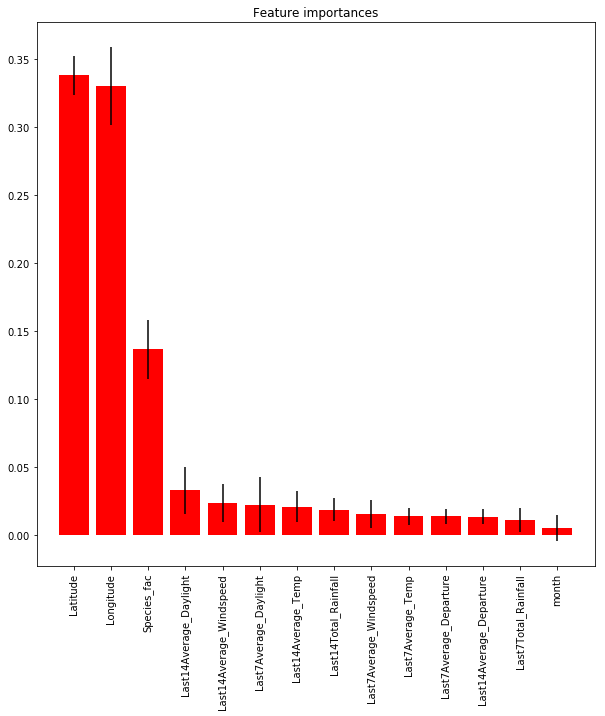

In [14]:
importances = model.feature_importances_
# calculate the standard deviation of feature importances by looping over the trees in the random forest
# 

std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot the feature importances of the forest
plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [15]:
importances = pd.DataFrame(zip(model.feature_importances_,),
                           index=X.columns, columns=['rf_importance']).sort_values('rf_importance',
                                                                   ascending=False)

                           
importances.plot(kind='bar')
importances.head()

,rf_importance
Latitude,0.338195
Longitude,0.330365
Species_fac,0.136880
Last14Average_Daylight,0.033382
Last14Average_Windspeed,0.024056


In [16]:
cv = StratifiedKFold(y, n_folds=10, shuffle=True)
score = cross_val_score(model, X, y, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Random Forest with unBalanced Classes", score.mean().round(3), score.std().round(3))

Random Forest with unBalanced Classes Score:	0.94 ± 0.003


In [17]:
parameters = {'n_estimators':[10,100,500,1000], 'criterion': ['gini', 'entropy'],
              'max_depth': [2,4,6,8,10], 'min_samples_split': [2,5],
              'class_weight':[None, 'balanced']}
GridModel = GridSearchCV(RandomForestClassifier(n_jobs=-1),parameters, cv=cv)

GridModel.fit(X, y)
print "Best Parameters Are " + str(GridModel.best_params_)
print "Best Score is " + str(GridModel.best_score_)

Best Parameters Are {'min_samples_split': 2, 'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 10, 'class_weight': None}
Best Score is 0.948791166952


In [21]:
y_pred = GridModel.predict(X_test)
print roc_auc_score(y_test, y_pred)

0.538891763298


OTHER RF

In [8]:
X = data.loc[:, 'Last7Average_Temp':'month']
y= data['WnvPresent']
model2 = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=40,max_features='auto', max_depth=10,class_weight=None)
model2.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=True, random_state=40,
            verbose=0, warm_start=False)

In [12]:
print "Auc_Roc Score: ", roc_auc_score(y, model2.oob_prediction)

Auc_Roc Score: 

AttributeError: 'RandomForestClassifier' object has no attribute 'oob_prediction'

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35, stratify=y)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(7354, 14) (7354,)
(3152, 14) (3152,)


In [20]:
y_pred = model2.predict(X_test)
print roc_auc_score(y_test, y_pred)

0.572057704599
